## Dependencies

In [1]:
import numpy as np
import pandas as pd

from utils import *

## I/O - Initialization

In [2]:
# load the feature dataset as a dataframe
csv_file = 'eeg_features.csv'
channel_list = ['F3', 'F4','C3','Cz','Oz']
selected_channels, selected_labels = data_loader(path = csv_file, channel_list = channel_list, ds = False, ds_rate = 1)

## P-Value Thresholding

In [11]:
all = feature_selection(selected_channels=selected_channels, feature_subset=selected_channels.columns[:72]) # select every feature
p_all, p_dict = p_value_thresholding(selected_features=all, selected_labels=selected_labels)

In [12]:
p_all

['mel_11',
 'complexity',
 'spc_roff',
 'mel_10',
 'slope',
 'mel_12',
 'mel_9',
 'mel_6',
 'mel_8',
 'mel_7',
 'mel_13',
 'spc_cnt',
 'mel_14',
 'mel_5',
 'mfcc_2',
 'mfcc_8',
 'mobility',
 'zc',
 'mel_1',
 'mfcc_6',
 'mel_2',
 'mel_0',
 'mel_3',
 'dfa',
 'mel_4',
 'gamma_beta',
 'gamma_alpha',
 'mfcc_1',
 'mfcc_0',
 'mfcc_3',
 'alpha_delta',
 'chr_14',
 'chr_13',
 'chr_12',
 'chr_11',
 'alpha_theta',
 'beta_alpha',
 'mfcc_5',
 'mfcc_4',
 'gamma_delta',
 'mfcc_7',
 'gamma_theta',
 'beta_theta',
 'chr_2',
 'chr_1',
 'chr_4',
 'chr_3',
 'theta_delta',
 'rms',
 'skew',
 'chr_10',
 'beta_delta',
 'chr_5',
 'chr_15',
 'mfcc_9',
 'alpha_power',
 'chr_6',
 'chr_0',
 'chr_7',
 'gamma_power',
 'beta_power',
 'activity',
 'chr_18',
 'chr_17',
 'theta_power',
 'kurtosis',
 'delta_power',
 'chr_19',
 'chr_8',
 'chr_9',
 'mean_abs_sec_dif',
 'chr_16']

## Manual Feature Selection

In [9]:
models = ['K-NN', 'GBC']
subset_1 = ['slope', 'mel_0', 'spc_roff', 'spc_cnt', 'zc', 'gamma_delta', 'gamma_beta', 'gamma_alpha', 'chr_9', 'chr_8', 'mfcc_0', 'mfcc_1']
subset_2 = []
subset_3 = []
subset_4 = []
subset_5 = []
subset_6 = []

In [13]:
data = data_preparation(selected_channels=selected_channels, selected_labels=selected_labels, feature_subset=subset_1)
for model in models:
    model_training(data, model, stats=False, cm=False, verbose=True)

Accuracy of K-NN classifier on training set: 0.80378338
Accuracy of K-NN classifier on test set: 0.73936696
Accuracy of GBC classifier on training set: 1.00000000
Accuracy of GBC classifier on test set: 0.74233432


In [35]:
models = ['GBC']
data = data_preparation(selected_channels=selected_channels, selected_labels=selected_labels, feature_subset=p_all[:5])
for model in models:
    model_training(data, model, stats=False, cm=False, verbose=True)

Accuracy of GBC classifier on training set: 1.00000000
Accuracy of GBC classifier on test set: 0.72749753


In [24]:
data = data_preparation(selected_channels=selected_channels, selected_labels=selected_labels, feature_subset=p_all[44:50])
for model in models:
    model_training(data, model, stats=False, cm=False, verbose=True)

Accuracy of K-NN classifier on training set: 0.72613749
Accuracy of K-NN classifier on test set: 0.55835806
Accuracy of GBC classifier on training set: 1.00000000
Accuracy of GBC classifier on test set: 0.66518299


In [28]:
data = data_preparation(selected_channels=selected_channels, selected_labels=selected_labels, feature_subset=(p_all[:15]+p_all[44:50]))
for model in models:
    model_training(data, model, stats=False, cm=False, verbose=True)

Accuracy of K-NN classifier on training set: 0.83370425
Accuracy of K-NN classifier on test set: 0.74530168
Accuracy of GBC classifier on training set: 1.00000000
Accuracy of GBC classifier on test set: 0.77843719


In [29]:
data = data_preparation(selected_channels=selected_channels, selected_labels=selected_labels, feature_subset=(p_all[:20]+p_all[44:50]))
for model in models:
    model_training(data, model, stats=False, cm=False, verbose=True)

Accuracy of K-NN classifier on training set: 0.85163205
Accuracy of K-NN classifier on test set: 0.75914936
Accuracy of GBC classifier on training set: 1.00000000
Accuracy of GBC classifier on test set: 0.77843719


In [30]:
data = data_preparation(selected_channels=selected_channels, selected_labels=selected_labels, feature_subset=(p_all[:20]))
for model in models:
    model_training(data, model, stats=False, cm=False, verbose=True)

Accuracy of K-NN classifier on training set: 0.84953017
Accuracy of K-NN classifier on test set: 0.75024728
Accuracy of GBC classifier on training set: 1.00000000
Accuracy of GBC classifier on test set: 0.76458952


In [31]:
data = data_preparation(selected_channels=selected_channels, selected_labels=selected_labels, feature_subset=['spc_cnt', 'spc_roff', 'slope'])
for model in models:
    model_training(data, model, stats=False, cm=False, verbose=True)

Accuracy of K-NN classifier on training set: 0.78041543
Accuracy of K-NN classifier on test set: 0.69287834
Accuracy of GBC classifier on training set: 0.99888724
Accuracy of GBC classifier on test set: 0.69386746


In [32]:
data = data_preparation(selected_channels=selected_channels, selected_labels=selected_labels, feature_subset=p_all[:5])
for model in models:
    model_training(data, model, stats=False, cm=False, verbose=True)

Accuracy of K-NN classifier on training set: 0.78820475
Accuracy of K-NN classifier on test set: 0.68545994
Accuracy of GBC classifier on training set: 0.99987636
Accuracy of GBC classifier on test set: 0.70919881


## Yurteri's Method

In [44]:
from tqdm import tqdm 
models = ['GBC']
accuracies = []
features = []
delta_thr = 0.001
for feature in tqdm(p_all):
    features.append(feature)
    data = data_preparation(selected_channels=selected_channels, selected_labels=selected_labels, feature_subset=features)
    for model in models:
        training, test = model_training(data, model, stats=False, cm=False, verbose=False)
    if len(accuracies) > 5:
        last = np.mean(accuracies[:6])
        delta = test - last
        if delta <= delta_thr:
            print("The accuracies platoed at: ", features)
            print("The accuracies platoed at: ", accuracies)
            print(test)
            break
    accuracies.append(test)
    
'''
result of this cell:
accuracies = [0.6285855588526211,
 0.6671612265084075,
 0.6973293768545994,
 0.7012858555885262,
 0.7091988130563798,
 0.7146389713155292,
 0.7240356083086054,
 0.7344213649851632,
 0.7314540059347181,
 0.734915924826904,
 0.7398615232443125,
 0.7487636003956478,
 0.7522255192878339,
 0.7596439169139466,
 0.7546983184965381,
 0.7596439169139466,
 0.7611275964391692,
 0.755192878338279,
 0.7645895153313551,
 0.7645895153313551,
 0.7744807121661721,
 0.7720079129574678,
 0.7720079129574678,
 0.7799208704253214,
 0.7833827893175074,
 0.7784371909000989,
 0.7893175074183977,
 0.7937685459940653,
 0.7952522255192879,
 0.7903066271018794,
 0.7848664688427299,
 0.7873392680514342,
 0.794757665677547,
 0.7952522255192879,
 0.7917903066271019,
 0.7932739861523245,
 0.7903066271018794,
 0.7952522255192879,
 0.7917903066271019,
 0.7972304648862513,
 0.7962413452027696,
 0.7977250247279921,
 0.8016815034619189,
 0.8016815034619189,
 0.8021760633036598,
 0.8011869436201781,
 0.7962413452027696,
 0.8011869436201781,
 0.804648862512364,
 0.7962413452027696,
 0.8135509396636993]
'''

100%|██████████| 51/51 [40:40<00:00, 47.86s/it]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


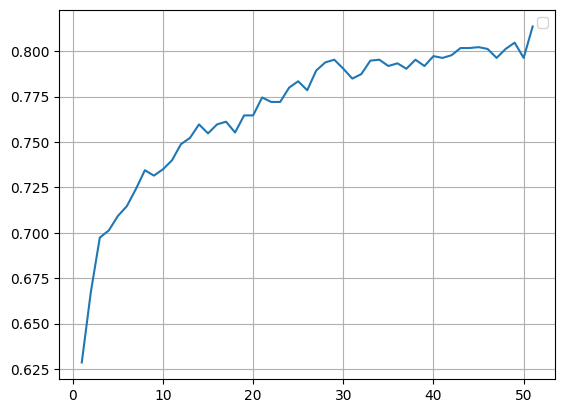

In [53]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(1,len(accuracies),len(accuracies)), accuracies)
plt.legend(['GBC'])
plt.savefig('foo.png', bbox_inches='tight')
plt.grid()
plt.show()

In [52]:
for i in range(len(accuracies) - 1):
    delta = accuracies[i+1] - accuracies[i]
    if delta <= 0:
        print(p_all[i+1])

mfcc_2
dfa
chr_9
gamma_alpha
mfcc_0
mfcc_3
chr_10
gamma_delta
gamma_theta
chr_0
chr_3
chr_4
gamma_power
chr_6
chr_13
chr_12
chr_11


In [61]:
p_better = []
for i in range(len(accuracies) - 1):
    delta = accuracies[i+1] - accuracies[i]
    if delta <= 0:
        continue
    else:
        p_better.append(p_all[i])

In [62]:
data = data_preparation(selected_channels=selected_channels, selected_labels=selected_labels, feature_subset=p_better)
for model in models:
    training, test = model_training(data, model, stats=False, cm=False, verbose=True)

In [65]:
from tqdm import tqdm 
models = ['K-NN']
accuracies = []
features = []
delta_thr = 0.001
for feature in tqdm(p_all):
    features.append(feature)
    data = data_preparation(selected_channels=selected_channels, selected_labels=selected_labels, feature_subset=features)
    for model in models:
        training, test = model_training(data, model, stats=False, cm=False, verbose=False)
    if len(accuracies) > 5:
        last = np.mean(accuracies[:6])
        delta = test - last
        if delta <= delta_thr:
            print("The accuracies platoed at: ", features)
            print("The accuracies platoed at: ", accuracies)
            print(test)
            break
    accuracies.append(test)

100%|██████████| 51/51 [00:10<00:00,  5.08it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


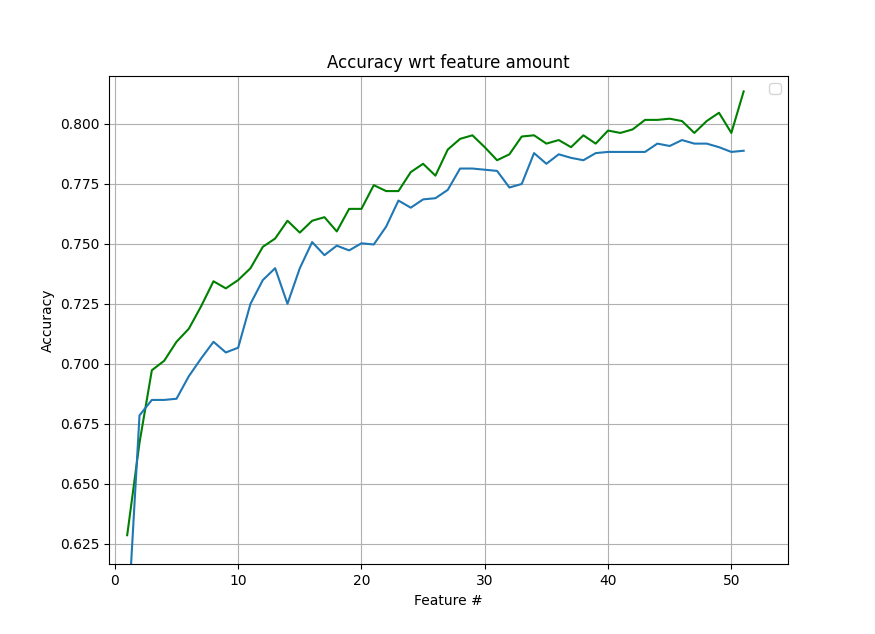

In [66]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(1,len(accuracies),len(accuracies)), accuracies)
plt.legend()
plt.savefig('foo.png', bbox_inches='tight')
plt.grid()
plt.show()

In [67]:
from tqdm import tqdm 
models = ['SVM']
accuracies = []
features = []
delta_thr = 0.001
for feature in tqdm(p_all):
    features.append(feature)
    data = data_preparation(selected_channels=selected_channels, selected_labels=selected_labels, feature_subset=features)
    for model in models:
        training, test = model_training(data, model, stats=False, cm=False, verbose=False)
    if len(accuracies) > 5:
        last = np.mean(accuracies[:6])
        delta = test - last
        if delta <= delta_thr:
            print("The accuracies platoed at: ", features)
            print("The accuracies platoed at: ", accuracies)
            print(test)
            break
    accuracies.append(test)

100%|██████████| 51/51 [02:49<00:00,  3.32s/it]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


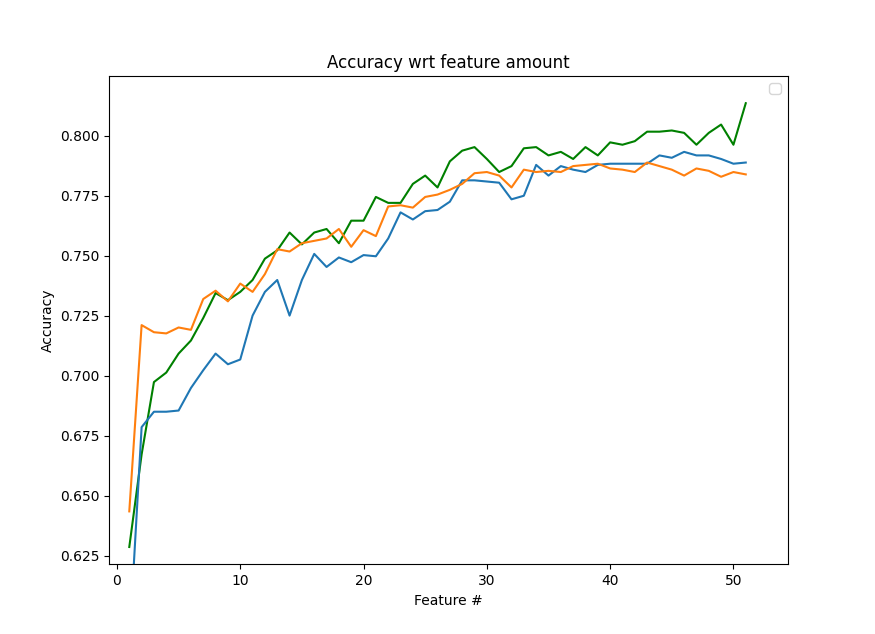

In [68]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(1,len(accuracies),len(accuracies)), accuracies)
plt.legend()
plt.savefig('foo.png', bbox_inches='tight')
plt.grid()
plt.show()
plt.legend(['GBC', 'K-NN', 'SVM'])

In [69]:
from tqdm import tqdm 
models = ['DTC']
accuracies = []
features = []
delta_thr = 0.001
for feature in tqdm(p_all):
    features.append(feature)
    data = data_preparation(selected_channels=selected_channels, selected_labels=selected_labels, feature_subset=features)
    for model in models:
        training, test = model_training(data, model, stats=False, cm=False, verbose=False)
    if len(accuracies) > 5:
        last = np.mean(accuracies[:6])
        delta = test - last
        if delta <= delta_thr:
            print("The accuracies platoed at: ", features)
            print("The accuracies platoed at: ", accuracies)
            print(test)
            break
    accuracies.append(test)

100%|██████████| 51/51 [00:09<00:00,  5.20it/s]


In [71]:
from tqdm import tqdm 
models = ['NN']
accuracies = []
features = []
delta_thr = 0.001
for feature in tqdm(p_all):
    features.append(feature)
    data = data_preparation(selected_channels=selected_channels, selected_labels=selected_labels, feature_subset=features)
    for model in models:
        training, test = model_training(data, model, stats=False, cm=False, verbose=False)
    if len(accuracies) > 5:
        last = np.mean(accuracies[:6])
        delta = test - last
        if delta <= delta_thr:
            print("The accuracies platoed at: ", features)
            print("The accuracies platoed at: ", accuracies)
            print(test)
            break
    accuracies.append(test)

100%|██████████| 51/51 [10:31<00:00, 12.39s/it]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


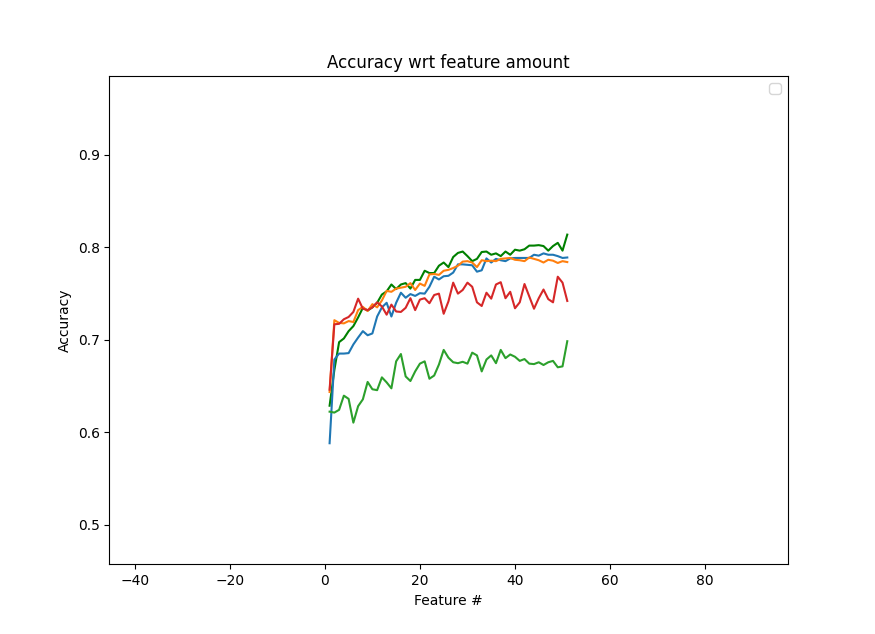

In [72]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(1,len(accuracies),len(accuracies)), accuracies)
plt.legend()
plt.savefig('foo.png', bbox_inches='tight')
plt.grid()
plt.show()
plt.legend(['GBC', 'K-NN', 'SVM', 'DTC', 'NN'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


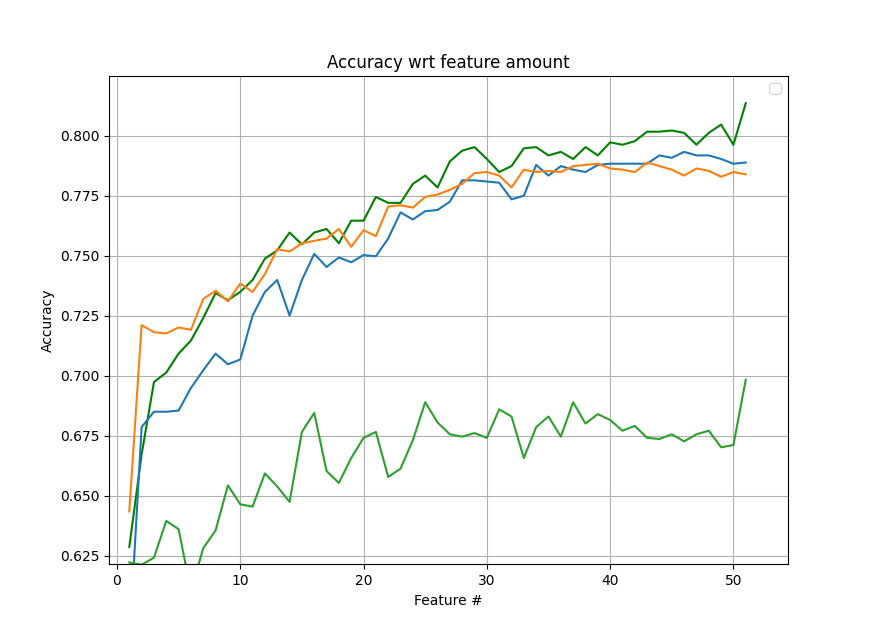

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(1,len(accuracies),len(accuracies)), accuracies)
plt.legend()
plt.savefig('foo.png', bbox_inches='tight')
plt.grid()
plt.show()
plt.legend(['GBC', 'K-NN', 'SVM', 'DTC'])

In [28]:
from tqdm import tqdm 
models = ['K-NN']
accuracies = []
features = []
delta_thr = 0.001
for feature in tqdm(p_all):
    features.append(feature)
    data = data_preparation(selected_channels=selected_channels, selected_labels=selected_labels, feature_subset=features)
    for model in models:
        training, test = model_training(data, model, stats=False, cm=False, verbose=False)
    if len(accuracies) > 5:
        last = np.mean(accuracies[:6])
        delta = test - last
        if delta <= delta_thr:
            print("The accuracies platoed at: ", features)
            print("The accuracies platoed at: ", accuracies)
            print(test)
            break
    accuracies.append(test)

100%|██████████| 58/58 [00:10<00:00,  5.43it/s]


In [32]:
from tqdm import tqdm 
models = ['K-NN']
accuracies = []
features = []
delta_thr = 0.001
for feature in tqdm(reversed(p_all)):
    features.append(feature)
    data = data_preparation(selected_channels=selected_channels, selected_labels=selected_labels, feature_subset=features)
    for model in models:
        training, test = model_training(data, model, stats=False, cm=False, verbose=False)
    if len(accuracies) > 5:
        last = np.mean(accuracies[:6])
        delta = test - last
        if delta <= delta_thr:
            print("The accuracies platoed at: ", features)
            print("The accuracies platoed at: ", accuracies)
            print(test)
            break
    accuracies.append(test)

58it [00:10,  5.60it/s]


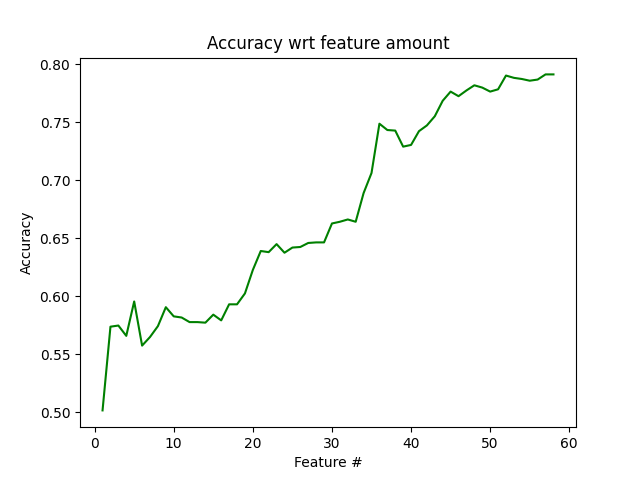

In [33]:
from mpl_interactions import ioff, panhandler, zoom_factory
import matplotlib.pyplot as plt
%matplotlib widget

with plt.ioff():
    figure, axis = plt.subplots()
# creating the bar plot
plt.xlabel("Feature #")
plt.ylabel("Accuracy")
plt.title("Accuracy wrt feature amount")
plt.plot(np.linspace(1,len(accuracies),len(accuracies)), accuracies, color='green')
disconnect_zoom = zoom_factory(axis)
# Enable scrolling and panning with the help of MPL
# Interactions library function like panhandler.
pan_handler = panhandler(figure)
display(figure.canvas)